In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv(r'C:\Users\parth\OneDrive\Desktop\PROJECT_WORK\Hand Written Digits\train.csv')
test = pd.read_csv(r'C:\Users\parth\OneDrive\Desktop\PROJECT_WORK\Hand Written Digits\test.csv')

In [26]:
#extract labels
label_train = train['label']

#extracting features
feature_train = train.drop(['label'], axis = 1)
feature_test = test

In [27]:
X_train = np.array(feature_train)
Y_train = np.array(label_train)
X_test = np.array(feature_test)

In [28]:
#TRY PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(pd.DataFrame(X_train))

feature_train_scale = scaler.transform(pd.DataFrame(X_train))

scaler.fit(pd.DataFrame(X_test))

feature_test_scale = scaler.transform(pd.DataFrame(X_test))

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca.fit(feature_train_scale)

X_pca = pca.transform(feature_train_scale)

X_pca_test = pca.transform(feature_test_scale)

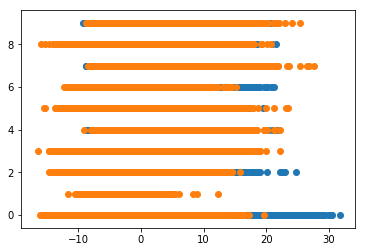

In [30]:
x1 = X_pca[:,0]
x2 = X_pca[:,1]
plt.scatter(x1,Y_train)
plt.scatter(x2,Y_train)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators = 100)

rmodel.fit(X_pca,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
print(rmodel.score(X_pca,Y_train)) #accuracy of training the model
rmodel.predict(X_pca_test[1226].reshape(1,-1))

1.0


array([0], dtype=int64)